In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import seaborn as sns

In [ ]:
#df=pd.read_csv("processedtrain.csv") i have question here
# df=pd.read_csv("C:/Users/Dell/Downloads/Data Science Track/Weather/datasets/clean/processedtrain.csv")
# df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_Nnw,WindDir3pm_Nw,WindDir3pm_S,WindDir3pm_Se,WindDir3pm_Sse,WindDir3pm_Ssw,WindDir3pm_Sw,WindDir3pm_W,WindDir3pm_Wnw,WindDir3pm_Wsw
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0


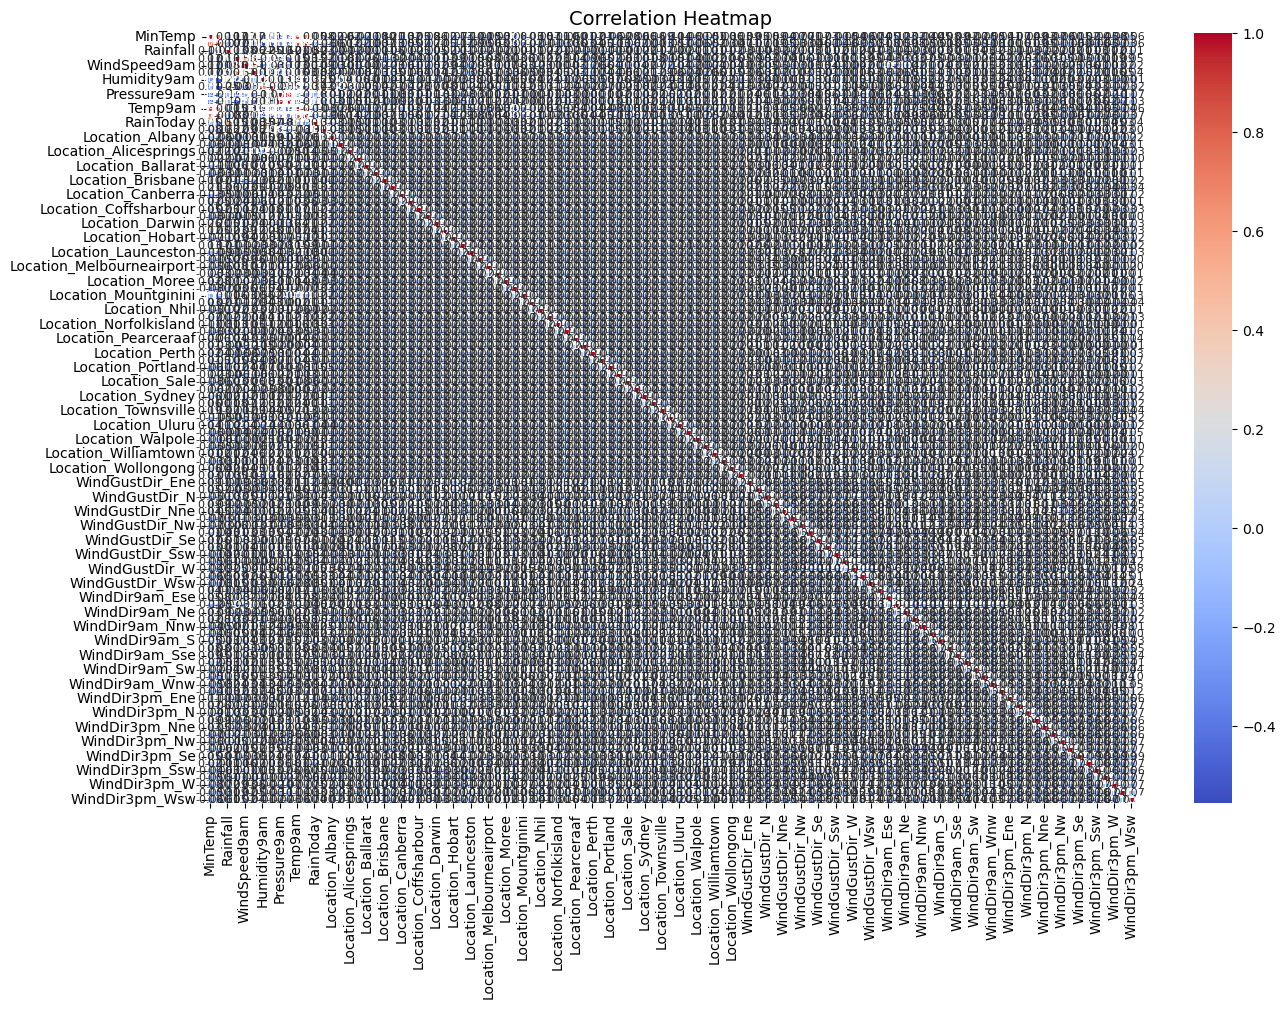

In [ ]:
# #heat map
# numeric_data = df.drop(columns=["Date"]).select_dtypes(include=['int64', 'float64']) 
# corr_matrix = numeric_data.corr()

# plt.figure(figsize=(15,10))  
# sns.heatmap(
#     corr_matrix,
#     annot=True,
#     annot_kws={'size': 8},  
#     fmt='.2f',
#     cmap='coolwarm',
#     linewidths=1,
# )
# plt.title("Correlation Heatmap", fontsize=14)
# plt.show()
